In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import os
import pickle
os.chdir('/content/gdrive/My Drive/self_driving')
print(os.getcwd())

/content/gdrive/My Drive/self_driving


# New Section

In [0]:
file2=open('/content/gdrive/My Drive/self_driving/y.pickle','rb')
y=pickle.load(file2)
file2.close()

In [0]:
file1=open('/content/gdrive/My Drive/self_driving/X.pickle','rb')
x=pickle.load(file1)
file1.close()

In [0]:
split=int(len(x)*.25)
train_x=x[:split]
train_y=y[:split]

In [0]:
#normalizing the data
train_x=train_x/255.0

In [0]:
test_x=test_x/255.0

shape of train_x :  (15956, 200, 66, 3)
shape of train_y :  (15956,)


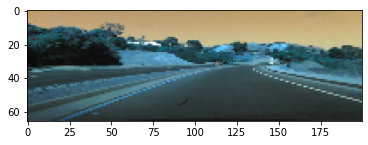

In [8]:
#reshaping the image 
print("shape of train_x : ",train_x.shape)
print("shape of train_y : ",train_y.shape)
train_x=train_x.reshape(-1,66,200,3)
#test_x=test_x.reshape(-1,66,200,3)
import matplotlib.pyplot as plt
plt.imshow(train_x[60])

In [0]:
del(x)

In [10]:
#importing the libraries
from keras.layers import Dense,Activation,Dropout,Flatten
from keras.models import Sequential
from keras.layers import Conv2D
import keras
from keras.regularizers import l2
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
#building the model
input_shape=train_x.shape[1:]
model=Sequential()

#model_1
model.add( Conv2D(24,(5,5) ,activation='relu', input_shape=input_shape))

#model 2
model.add( Conv2D(36,(5,5),activation='relu'))

#model 3
model.add( Conv2D(48,(5,5),activation='relu'))

#model 4
model.add( Conv2D(64,(3,3),activation='relu'))

#model 5
model.add(Conv2D(64,(3,3),activation='relu'))

#now we flatten the image
#image become 1-Dimention array
model.add(Flatten())

#first layer
model.add(Dense(1164,activation='relu',bias_regularizer=l2(0.01)))

model.add(Dropout(.2))

#second layer
model.add(Dense(100,activation='relu',bias_regularizer=l2(0.001)))
model.add(Dropout(.2))

#third layer
model.add(Dense(50,activation='relu',bias_regularizer=l2(0.001)))
model.add(Dropout(.2))

#4th layer
model.add(Dense(10,activation='relu',bias_regularizer=l2(0.001)))
model.add(Dropout(.2))

#output layer
model.add(Dense(1))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 196, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 192, 36)       21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 54, 188, 48)       43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 52, 186, 64)       27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 184, 64)       36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 588800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1164)             

In [0]:
#selecting the optimizer
epoch=30
batch_size=100
optimizer=keras.optimizers.Adam(learning_rate=1e-4)

In [0]:
#compiling the model
model.compile(optimizer=optimizer,loss='mse',metrics=['mae', 'mse'])

In [15]:
#fitting the model 
history=model.fit(train_x,train_y,batch_size=100,epochs=10,verbose=1,validation_split = 0.2)

Train on 12764 samples, validate on 3192 samples
Epoch 1/10
12764/12764 [==============================] - 668s 52ms/step - loss: 0.0480 - mae: 0.1345 - mse: 0.0480 - val_loss: 0.0236 - val_mae: 0.1205 - val_mse: 0.0236
Epoch 2/10
12764/12764 [==============================] - 665s 52ms/step - loss: 0.0292 - mae: 0.1050 - mse: 0.0292 - val_loss: 0.0240 - val_mae: 0.1256 - val_mse: 0.0240
Epoch 3/10
12764/12764 [==============================] - 667s 52ms/step - loss: 0.0214 - mae: 0.0895 - mse: 0.0214 - val_loss: 0.0242 - val_mae: 0.1262 - val_mse: 0.0242
Epoch 4/10
12764/12764 [==============================] - 661s 52ms/step - loss: 0.0181 - mae: 0.0808 - mse: 0.0181 - val_loss: 0.0249 - val_mae: 0.1274 - val_mse: 0.0249
Epoch 5/10
12764/12764 [==============================] - 663s 52ms/step - loss: 0.0147 - mae: 0.0744 - mse: 0.0147 - val_loss: 0.0248 - val_mae: 0.1280 - val_mse: 0.0248
Epoch 6/10
12764/12764 [==============================] - 665s 52ms/step - loss: 0.0154 - mae: 0

In [0]:
#saving the model
file=open('/content/gdrive/My Drive/self_driving/model.pickle','wb')
pickle.dump(history,file)
file.close()